In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("Chen2020_Taxa_table_None_collapsed.txt", delimiter = "\t")
df.drop(['Variable_Region', 'Cohort', 'Subjects_Location', 'Control_Type', 'Unnamed: 0'], axis = 1, inplace = True)
df.drop(['original_name', 'Description', 'Household', 'Status', 'Age'], axis = 1, inplace = True)
df['Sex'] = (df['Sex']=='female')*1
df['Diagnosis'] = (df['Diagnosis']=='ASD')*1
# df.replace({'Age':{'not collected':np.nan}}, inplace = True)
# mean_age = pd.to_numeric(df['Age'], errors='coerce').mean()
df.dropna(inplace = True)
# df.fillna(mean_age, inplace = True)import pandas as pd

x = df.iloc[: , :-2].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled)
new_df['Sex'] = df['Sex']
new_df['Diagnosis'] = df['Diagnosis']
new_df.columns = df.columns
df = new_df
print(df)
df.sample(30)

     k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__  \
0                                                  0.0                                                                             
1                                                  0.0                                                                             
2                                                  0.0                                                                             
3                                                  0.0                                                                             
4                                                  0.0                                                                             
..                                                 ...                                                                             
240                                                0.0                      

,k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobrevibacter; s__,k__Archaea; p__Euryarchaeota; c__Thermoplasmata; o__E2; f__[Methanomassiliicoccaceae]; g__vadinCA11; s__,k__Bacteria,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Actinomycetaceae; g__Actinomyces; s__,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Micrococcaceae; g__Rothia; s__mucilaginosa,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__adolescentis,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__bifidum,...,k__Bacteria; p__TM7; c__TM7-3; o__CW040; f__; g__; s__,k__Bacteria; p__Tenericutes; c__Mollicutes; o__Anaeroplasmatales; f__Anaeroplasmataceae; g__; s__,k__Bacteria; p__Tenericutes; c__Mollicutes; o__RF39; f__; g__; s__,k__Bacteria; p__Tenericutes; c__RF3; o__ML615J-28; f__; g__; s__,k__Bacteria; p__Verrucomicrobia; c__Opitutae,k__Bacteria; p__Verrucomicrobia; c__Opitutae; o__[Cerasicoccales]; f__[Cerasicoccaceae]; g__; s__,k__Bacteria; p__Verrucomicrobia; c__Verrucomicrobiae; o__Verrucomicrobiales; f__Verrucomicrobiaceae; g__Akkermansia; s__,k__Bacteria; p__Verrucomicrobia; c__Verrucomicrobiae; o__Verrucomicrobiales; f__Verrucomicrobiaceae; g__Akkermansia; s__muciniphila,Sex,Diagnosis
198,0.000000,0.0,0.001163,0.096257,0.0,0.000000,0.000000,0.001011,0.002266,0.016539,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.003558,0,1
60,0.000000,0.0,0.034884,0.256684,0.0,0.000000,0.000000,0.008960,0.031264,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.088670,1,0
65,0.000000,0.0,0.008140,0.000000,0.0,0.000000,0.022177,0.000202,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0
61,0.000000,0.0,0.194186,0.096257,0.0,0.000000,0.000000,0.009634,0.099683,0.000000,...,0.0,0.0,0.093555,0.000000,0.393939,0.0,0.0,0.052545,1,0
44,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0
125,0.000000,0.0,0.256395,0.000000,0.0,0.000000,0.014113,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.001642,0,1
114,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.012396,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022989,0,0
163,0.000000,0.0,0.005814,0.112299,0.0,0.166667,0.008065,0.000202,0.002719,0.000000,...,0.0,0.0,0.016632,0.000000,0.000000,0.0,0.0,0.000000,0,1
8,0.000000,0.0,0.074419,0.000000,0.0,0.666667,0.048387,0.001011,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.108648,0,1
174,0.000000,0.0,0.111047,0.000000,0.0,0.000000,0.000000,0.101731,0.000000,0.320611,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.164751,1,0


0.7183673469387755
0.6326530612244898
0.7020408163265306
0.7142857142857143
0.7142857142857143


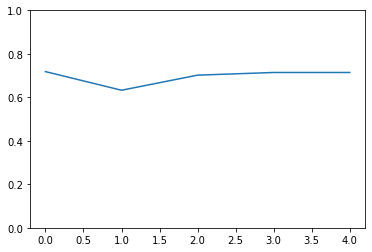

final: 0.689795918367347


In [158]:
from sklearn.model_selection import train_test_split

X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']

neurons_per_layer = 50
iterations = 5

xplt = []
yplt = []
for i in range(5):
    layers = tuple(neurons_per_layer for j in range(i))
    clf = MLPClassifier(activation = 'logistic', max_iter = 2000, hidden_layer_sizes = layers)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
    avg = 0;
    for j in range(iterations):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        avg+=score
    avg/=iterations
    xplt.append(i)
    yplt.append(avg)
    print(avg)
plt.plot(xplt, yplt)
plt.ylim(0,1)
plt.show()

X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']
print('final: ' + str(clf.score(X, y)))

In [149]:
from itertools import permutations

def scramble_cols(avg_score, k = 1, iterations = 10):
    result_i = []
    result_n = []
    for kk in range(1, k+1): #includes combinations of numbers less than k
        indices = list(combinations(range(252), kk))
        for index in indices: #tuple of columns we want
            avg_score_difference = 0
            new_df = df.copy();
            for it in range(iterations):
                for i in index: #go to each specific column
                    new_df.iloc[:, i] = np.random.permutation(df.iloc[:, i].values)
                    X = new_df.drop(['Diagnosis'], axis = 1)
                    y = new_df['Diagnosis']
                    avg_score_difference += avg_score-clf.score(X,y)
            avg_score_difference /= (iterations*len(index))
            result_i.append(','.join(tuple(map(str, index)))) #converts tuples to strings
            result_n.append(avg_score_difference)
    
    result = pd.DataFrame({'Columns': result_i, 'dScore': result_n})
    result.sort_values(by='dScore', inplace = True, ascending = False);
    result.reset_index(drop=True, inplace = True)
    return result

In [152]:
a = scramble_cols(0.7, 2, 3)
print(a)

       Columns    dScore
0         8,98  0.099320
1        37,72  0.096599
2      124,173  0.095238
3      134,214  0.094558
4        37,91  0.093878
...        ...       ...
31873    9,152  0.055102
31874   40,100  0.055102
31875  146,206  0.055102
31876   40,132  0.053741
31877   52,152  0.052381

[31878 rows x 2 columns]


In [153]:
a = scramble_cols(0.7, 1, 10)
print(a)

    Columns    dScore
0        98  0.086939
1       124  0.086531
2        37  0.085714
3        19  0.085306
4         8  0.084898
..      ...       ...
247     223  0.067347
248     215  0.067347
249      52  0.066939
250     152  0.066531
251     138  0.065306

[252 rows x 2 columns]


In [104]:
new_df = df.copy()
X = new_df.drop(['Diagnosis'], axis = 1)
y = new_df['Diagnosis']
clf.score(X, y)
print(new_df.iloc[:,2])

new_df.iloc[:, 2] = np.random.permutation(df.iloc[:, 2].values)

print(new_df.iloc[:,2])
print(df.iloc[:,2])
X = new_df.drop(['Diagnosis'], axis = 1)
y = new_df['Diagnosis']
clf.score(X, y)

0      0.009884
1      0.012791
2      0.010465
3      0.054651
4      0.179070
         ...   
240    0.033140
241    0.000000
242    0.001744
243    0.037791
244    0.001163
Name: k__Bacteria, Length: 245, dtype: float64
0      0.002907
1      0.009884
2      0.006977
3      0.000000
4      0.007558
         ...   
240    0.000000
241    0.029651
242    0.015698
243    0.028488
244    0.043023
Name: k__Bacteria, Length: 245, dtype: float64
0      0.009884
1      0.012791
2      0.010465
3      0.054651
4      0.179070
         ...   
240    0.033140
241    0.000000
242    0.001744
243    0.037791
244    0.001163
Name: k__Bacteria, Length: 245, dtype: float64


0.6326530612244898

In [127]:
sample = df.sample(100)
X = sample.drop(['Diagnosis'], axis = 1)
y = sample['Diagnosis']
print(clf.score(X,y))

0.66


In [141]:
result_i

NameError: name 'result_i' is not defined